In [0]:
from google.colab import drive
import numpy as np
from math import ceil
import time
import matplotlib.pyplot as plt
import os
import skimage.io
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
import keras, sys, time, warnings
from keras.models import *
from keras.layers import *
from keras import optimizers
from keras.callbacks import Callback, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import binary_crossentropy
import cv2
import seaborn as sns
from skimage.morphology import remove_small_objects
from skimage.morphology import erosion, dilation
%matplotlib inline

In [0]:
drive.mount('/content/drive')

path = '/content/drive/My Drive/deep learn/dataBrainMRI'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_data = []
for file_ in os.listdir(path + '/healthy_original/'):
  train_data.append(plt.imread(os.path.join(path + '/healthy_original/', file_))[:255,:255,:1].reshape(255,255,1))
x_train = np.asarray(train_data)

In [0]:
def create_deep_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 255

    # Энкодер
    input_img = Input(shape=(255, 255, 1))
    flat_img = Flatten()(input_img)
    x = Dense(encoding_dim*3, activation='relu')(flat_img)
    x = Dense(encoding_dim*2, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='linear')(x)
    
    # Декодер
    input_encoded = Input(shape=(encoding_dim,))
    x = Dense(encoding_dim*2, activation='relu')(input_encoded)
    x = Dense(encoding_dim*3, activation='relu')(x)
    flat_decoded = Dense(255*255, activation='sigmoid')(x)
    decoded = Reshape((255, 255, 1))(flat_decoded)
    
    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

d_encoder, d_decoder, d_autoencoder = create_deep_dense_ae()
d_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
d_autoencoder.summary()

In [0]:
d_autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_train, x_train))

In [0]:
test_data = []
for file_ in os.listdir(path + '/tumor_original/'):
  test_data.append(plt.imread(os.path.join(path + '/tumor_original/', file_))[:255,:255,:1].reshape(255,255,1))
x_test = np.asarray(test_data)

In [0]:
x_test.shape

In [0]:
encoded_imgs = d_encoder.predict(x_test, batch_size=135)

decoded_imgs = d_decoder.predict(encoded_imgs, batch_size=135)

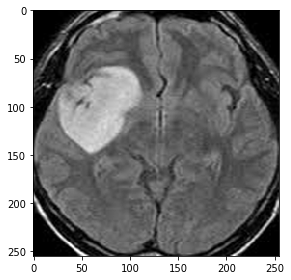

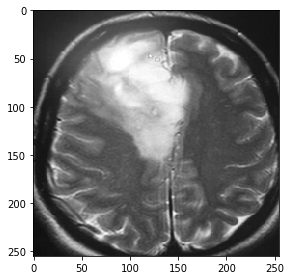

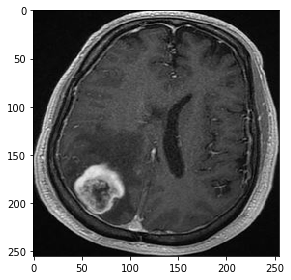

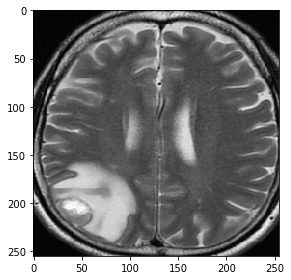

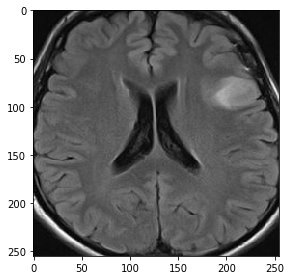

In [0]:
for i in range(0,5):
  skimage.io.imshow(x_test[i].reshape(255,255))
  plt.show()

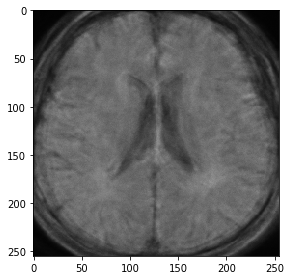

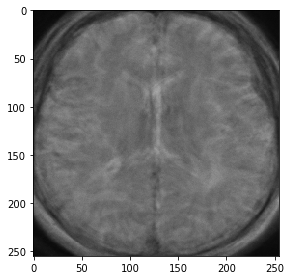

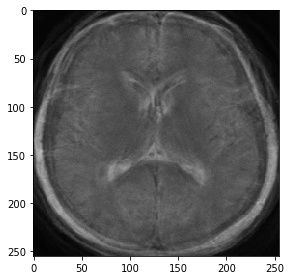

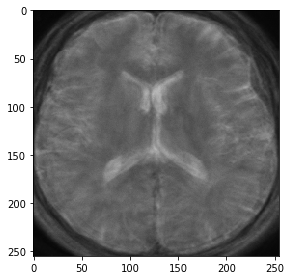

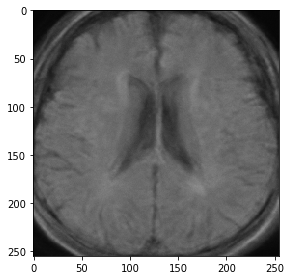

In [0]:
for x in range(0,5):
  skimage.io.imshow(decoded_imgs[x].reshape(255,255))
  plt.show()

In [0]:
masks = []
for x in range(0,len(x_test)):
  masks.append(np.clip((x_test[x].reshape(255,255) - decoded_imgs[x].reshape(255,255)), 0., 1.))  

In [0]:
rso_masks = []
for x in range(0,len(x_test)):
  rso_masks.append(remove_small_objects(masks[x]))

TypeError: ignored

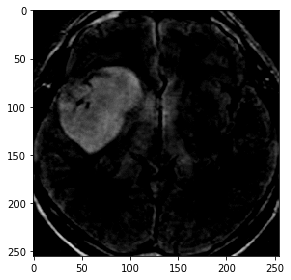

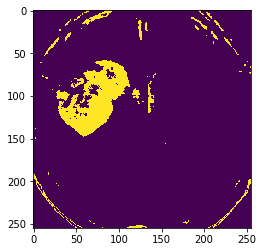

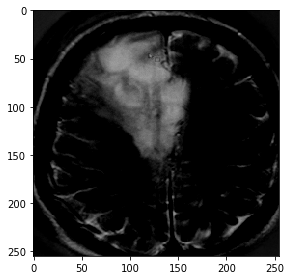

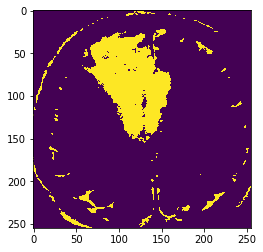

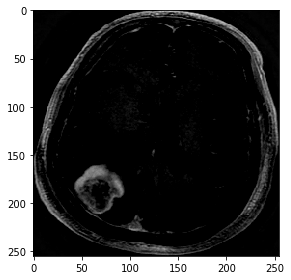

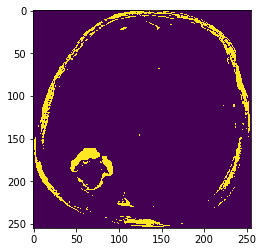

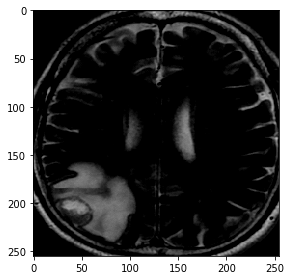

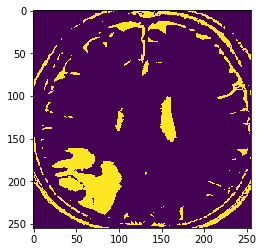

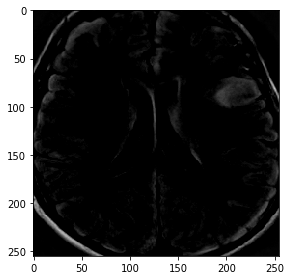

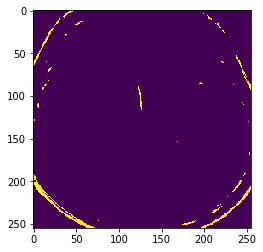

In [0]:
for x in range(0,5):
  th_mask = (0.25 < masks[x]) & (0.6 > masks[x])
  skimage.io.imshow(masks[x])
  plt.show()
  plt.imshow(th_mask)
  plt.show()

(array([6543461.,  863551.,  525976.,  353917.,  225890.,  140891.,
          69914.,   31144.,   16735.,    6896.]),
 array([0.        , 0.09979364, 0.19958727, 0.2993809 , 0.39917454,
        0.49896818, 0.5987618 , 0.69855547, 0.7983491 , 0.89814276,
        0.99793637], dtype=float32),
 <a list of 10 Patch objects>)

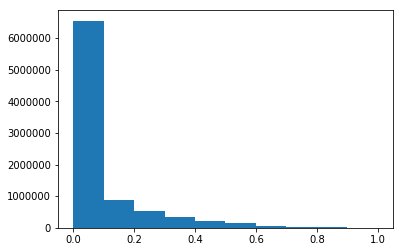

In [0]:
plt.hist(np.array(masks).ravel())

In [0]:
хууй = 0.3 < хуй
хууй

array([ True, False,  True, False, False, False,  True])

In [0]:
np.exp(-0.4)*((0.9/(0.84**0.5))*np.sin((0.84**0.5)) - (1/6)*np.cos((0.84**0.5))) - (5/6)*np.exp(-1) + 1

1.1477471515996434

In [0]:
1 - 2*np.exp(-1) + np.exp(-0.4)*(np.cos((0.84**0.5)) - (1/(0.84**0.5))*np.sin((0.84**0.5)))

0.09185174207988042